# 1. Preparation

In [2]:
# Import modules
import random
import cv2
import albumentations as A
from matplotlib import pyplot as plt

# 2. Add Annotations on Images

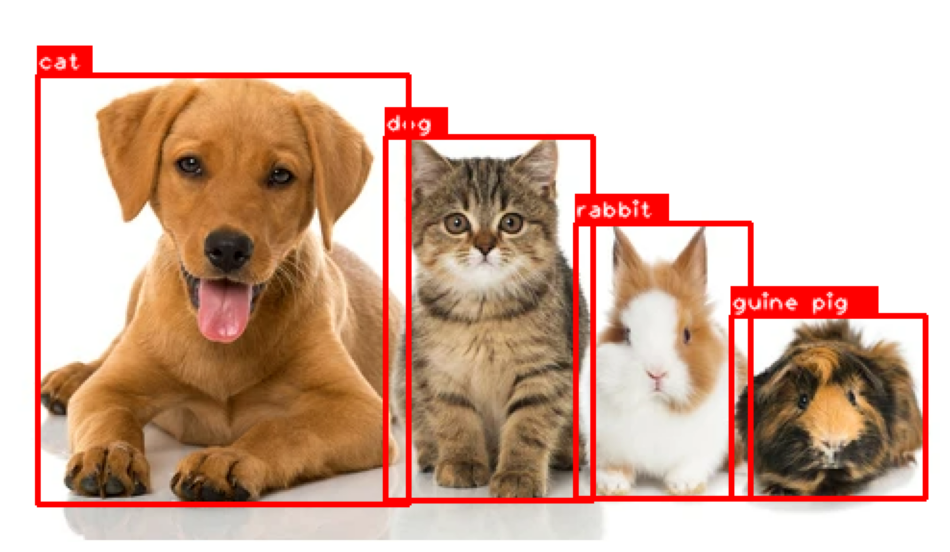

In [15]:
# Set colors for bounding boxes
COLOR_BOX = (255, 0, 0)      # Red
COLOR_TEXT = (255, 255, 255)       # White

# A function to draw bounding boxes
def display_bbox(image, bbox, class_name, color=COLOR_BOX, thickness=2):
    
    # Get coordinates
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min+w), int(y_min), int(y_min+h)
    
    # Draw rectangles for bounding boxes
    cv2.rectangle(image,
                  (x_min, y_min),
                  (x_max, y_max),
                  color = color,
                  thickness = thickness)
    
    # Get text positions
    ((text_width, text_height), _) = cv2.getTextSize(class_name,
                                                     cv2.FONT_HERSHEY_SIMPLEX,
                                                     0.5,  # Font scale: size of text relative to the base font size
                                                     3)     # Thickness
    # Draw rectangles for texts
    cv2.rectangle(image,
                  (x_min, y_min - int(1.3 * text_height)),
                  (x_min + text_width, y_min),
                   COLOR_BOX,
                  -1)
    
    # Put annotation texts
    cv2.putText(image,
                text = class_name,
                org = (x_min, y_min - int(0.3 * text_height)),
                fontFace = cv2.FONT_HERSHEY_PLAIN,
                fontScale = 0.8,
                color = COLOR_TEXT,
                lineType = cv2.LINE_AA)
    
    return image

# A function to display images
def display_image(image, bboxes, category_ids, category_id_to_name):
    image = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        image = display_bbox(image, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(image)
    
    
# Read images
image = cv2.imread('./data/cat_dog_rabbit.PNG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Info of Bounding boxes
bboxes = [[195, 66, 108, 189],
          [14, 34, 193, 223],
          [294, 111, 91, 143],
          [375, 159, 101, 95]]

# Info of categories
category_ids = [0, # Dog
                1, # Cat
                2, # Rabbit
                3] # Guine Pig
category_id_to_name = {0: 'dog',
                       1: 'cat',
                       2: 'rabbit',
                       3: 'guine pig'}

# Visualization of images with bounding boxes
display_image(image, bboxes, category_ids, category_id_to_name)


# 3. Apply Augmentations

### Horizontal Flip

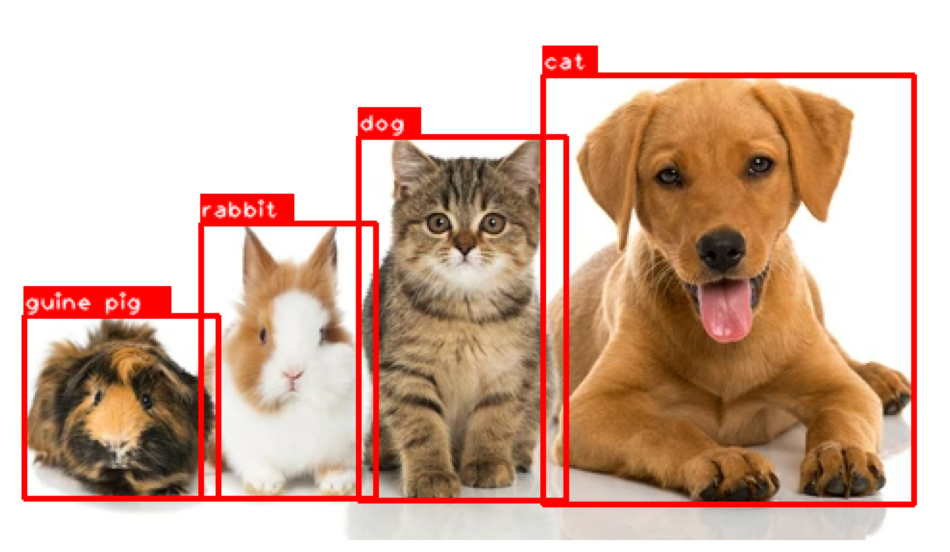

In [17]:
# Horizontal Flip
transform = A.Compose([A.HorizontalFlip(p=0.5)],
                      bbox_params = A.BboxParams(format = 'coco', label_fields=['category_ids']))

# Get a transformed image result
image_transformed = transform(image = image,
                              bboxes = bboxes,
                              category_ids = category_ids)

# Visualization
display_image(image_transformed['image'],
              image_transformed['bboxes'],
              image_transformed['category_ids'],
              category_id_to_name)

### Shift Scale Rotation

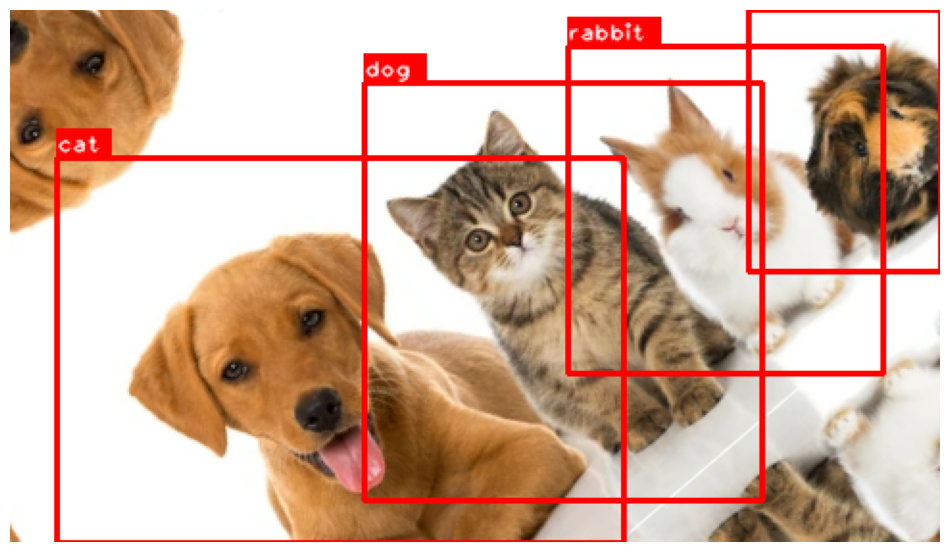

In [20]:
# Shift Scale Rotation
transform = A.Compose([A.ShiftScaleRotate(p = 0.5)],
                      bbox_params = A.BboxParams(format = 'coco', label_fields = ['category_ids']))

# Get a transformed image result
image_transformed = transform(image = image,
                              bboxes = bboxes,
                              category_ids = category_ids)

# Visualization
display_image(image_transformed['image'],
              image_transformed['bboxes'],
              image_transformed['category_ids'],
              category_id_to_name)

### Multiple Transformations

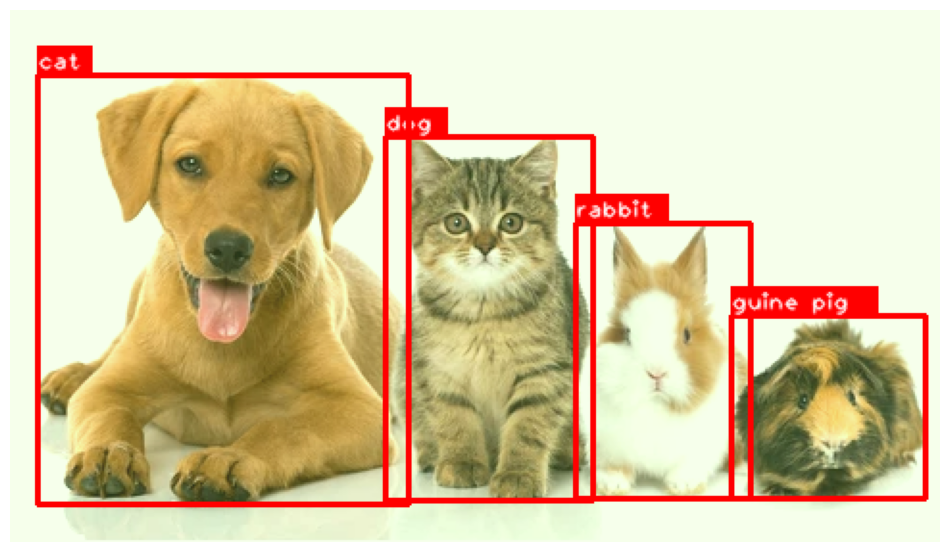

In [39]:
# Multiple Transformations
transform = A.Compose([A.HorizontalFlip(p=0.5),
                       A.ShiftScaleRotate(p=0.5),
                       A.RandomBrightnessContrast(p=0.3),
                       A.RGBShift(r_shift_limit = 30, 
                                  g_shift_limit = 30, 
                                  b_shift_limit = 30,
                                  p = 0.3)],
                      bbox_params = A.BboxParams(format = 'coco', label_fields = ['category_ids']))

# Get a transformed image result
image_transformed = transform(image = image,
                              bboxes = bboxes,
                              category_ids = category_ids)

# Visualization
display_image(image_transformed['image'],
              image_transformed['bboxes'],
              image_transformed['category_ids'],
              category_id_to_name)

# 4. Spatial Augmentations

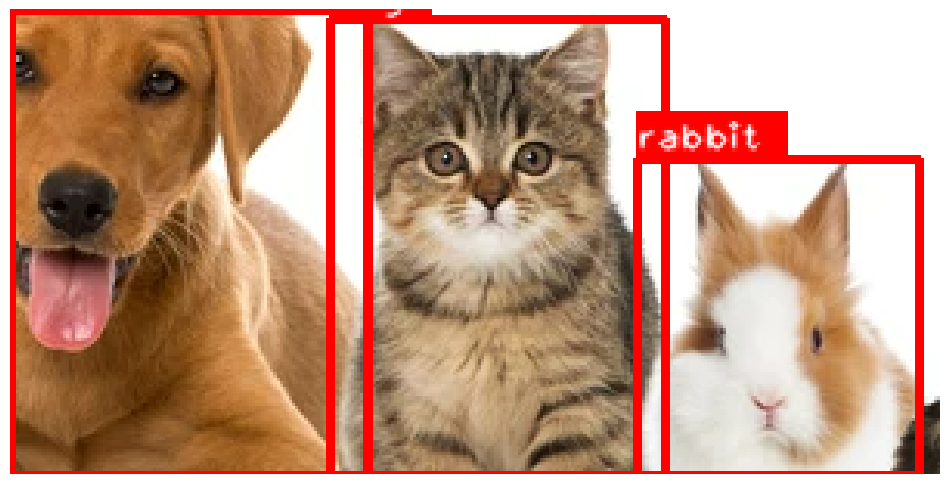

In [42]:
# Center Crop
transform = A.Compose([A.CenterCrop(height=150, width=300, p=1)],
                      bbox_params = A.BboxParams(format = 'coco', min_area = 4500, label_fields = ['category_ids']))

# Get a transformed image result
image_transformed = transform(image = image,
                              bboxes = bboxes,
                              category_ids = category_ids)

# Visualization
display_image(image_transformed['image'],
              image_transformed['bboxes'],
              image_transformed['category_ids'],
              category_id_to_name)